<a href="https://colab.research.google.com/github/mahhhdy/thesis/blob/main/LSTM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

lstm network without minmax scaler </br>
this post has been used </br>
https://towardsdatascience.com/bitcoin-price-prediction-using-lstm-9eb0938c22bd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense , LSTM
from keras.layers import BatchNormalization
from sklearn.metrics import mean_squared_error
from google.colab import drive
from keras.layers.normalization import batch_normalization

drive.mount('/content/drive')
path='/content/drive/MyDrive/DataSets/BTCPrediction/BitcoinData.csv'

df = pd.read_csv(path)
np.random.seed(7)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Dec 05, 2021","49,102.2","49,196.4","49,677.6","48,350.0",169.41K,-0.19%
1,"Dec 04, 2021","49,195.2","53,620.7","53,847.2","42,587.8",168.00K,-8.27%
2,"Dec 03, 2021","53,631.5","56,495.2","57,543.6","52,008.9",89.20K,-5.07%
3,"Dec 02, 2021","56,496.0","57,207.8","57,377.5","55,807.9",54.94K,-1.25%
4,"Dec 01, 2021","57,210.3","56,891.7","59,064.3","56,496.5",66.75K,0.58%


In [ ]:
df.drop(['Date'], 1, inplace=True)
# df['Date'] = pd.to_datetime(df['Date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
df['Change %'] = df['Change %'].str.slice(0, -1)
df['Vol.'] = df['Vol.'].str.slice(0, -1)

for x in ['Price','Open','High','Low']:
  if(df.dtypes[x]==np.object):
    df[x] = df[x].str.replace(',','')
    df[x] = df[x].astype(np.float64)

df['Vol.'] = pd.to_numeric(df['Vol.'], downcast="float")
df['Change %'] = pd.to_numeric(df['Change %'], downcast="float")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [ ]:
df.head() , df.shape

(     Price     Open     High      Low        Vol.  Change %
 0  49102.2  49196.4  49677.6  48350.0  169.410004     -0.19
 1  49195.2  53620.7  53847.2  42587.8  168.000000     -8.27
 2  53631.5  56495.2  57543.6  52008.9   89.199997     -5.07
 3  56496.0  57207.8  57377.5  55807.9   54.939999     -1.25
 4  57210.3  56891.7  59064.3  56496.5   66.750000      0.58, (3989, 6))

In [ ]:
df = df.to_numpy()
df

array([[ 4.91022000e+04,  4.91964000e+04,  4.96776000e+04,
         4.83500000e+04,  1.69410004e+02, -1.89999998e-01],
       [ 4.91952000e+04,  5.36207000e+04,  5.38472000e+04,
         4.25878000e+04,  1.68000000e+02, -8.27000046e+00],
       [ 5.36315000e+04,  5.64952000e+04,  5.75436000e+04,
         5.20089000e+04,  8.91999969e+01, -5.07000017e+00],
       ...,
       [ 3.00000000e-01,  3.00000000e-01,  3.00000000e-01,
         3.00000000e-01,  3.46000004e+00,  0.00000000e+00],
       [ 3.00000000e-01,  3.00000000e-01,  3.00000000e-01,
         3.00000000e-01,  3.60000014e-01,  0.00000000e+00],
       [ 3.00000000e-01,  3.00000000e-01,  3.00000000e-01,
         3.00000000e-01,  1.88000000e+00,  0.00000000e+00]])

In [ ]:
prediction_days = round(df.shape[0] * 0.7)

df_train= df[:len(df)-prediction_days]
df_test= df[len(df)-prediction_days:]

# X_train.shape , y_train.shape , X_test.shape , y_test.shape
df_train.shape , df_test.shape 

((1197, 6), (2792, 6))

ask from alireza --
sotone aval ro ham baraye amozesh estefade konam ?

In [ ]:
x_train = df_train[0:len(df_train)]
y_train = df_train[:,0:1]

x_test = df_test[0:len(df_test)]
y_test = df_test[:,0:1]

x_train.shape , y_train.shape , x_test.shape , y_test.shape

# # # x_train = np.reshape(x_train, (len(x_train), 1, 1))
x_train= x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test= x_test.reshape(x_test.shape[0],x_test.shape[1],1)

x_train.shape , y_train.shape , x_test.shape , y_test.shape

((1197, 6, 1), (1197, 1), (2792, 6, 1), (2792, 1))

In [ ]:
num_units = 4
activation_function = 'sigmoid'
optimizer = 'adam'
loss_function = 'mean_squared_error'
batch_size = 5
num_epochs = 50

# Initialize the RNN
model = Sequential()

model.add(BatchNormalization())

# Adding the input layer and the LSTM layer
model.add(LSTM(units = num_units, activation = activation_function, input_shape=(None, 1)))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = optimizer, loss = loss_function)

# Using the training set to train the model
# model.fit(x_train, y_train, batch_size = batch_size, epochs = num_epochs)
model.fit(x_train, y_train, validation_data=(x_train,y_train) , batch_size = batch_size, epochs = num_epochs , verbose=1)

Epoch 1/50
240/240 [==============================] - 3s 6ms/step - loss: 728840640.0000 - val_loss: 728823872.0000
Epoch 2/50
240/240 [==============================] - 2s 6ms/step - loss: 728808576.0000 - val_loss: 728794304.0000
Epoch 3/50
240/240 [==============================] - 1s 5ms/step - loss: 728778560.0000 - val_loss: 728760256.0000
Epoch 4/50
240/240 [==============================] - 2s 6ms/step - loss: 728738880.0000 - val_loss: 728719744.0000
Epoch 5/50
240/240 [==============================] - 2s 6ms/step - loss: 728702016.0000 - val_loss: 728686272.0000
Epoch 6/50
240/240 [==============================] - 2s 8ms/step - loss: 728670720.0000 - val_loss: 728655360.0000
Epoch 7/50
240/240 [==============================] - 1s 5ms/step - loss: 728638784.0000 - val_loss: 728619648.0000
Epoch 8/50
240/240 [==============================] - 1s 5ms/step - loss: 728593920.0000 - val_loss: 728568448.0000
Epoch 9/50
240/240 [==============================] - 2s 6ms/step - loss

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 6, 1)             4         
 ormalization)                                                   
                                                                 
 lstm (LSTM)                 (None, 4)                 96        
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 105
Trainable params: 103
Non-trainable params: 2
_________________________________________________________________


In [ ]:
test_set = df_test
len(test_set)

# inputs = np.reshape(test_set, (len(test_set), 1))
# inputs = min_max_scaler.transform(inputs)

inputs= test_set.reshape(test_set.shape[0],test_set.shape[1],1)


# inputs = test_set.reshape((len(test_set), 1, 1))

predicted_price = model.predict(inputs)

# I have to ask from Alireza
# predicted_price = min_max_scaler.inverse_transform(predicted_price)

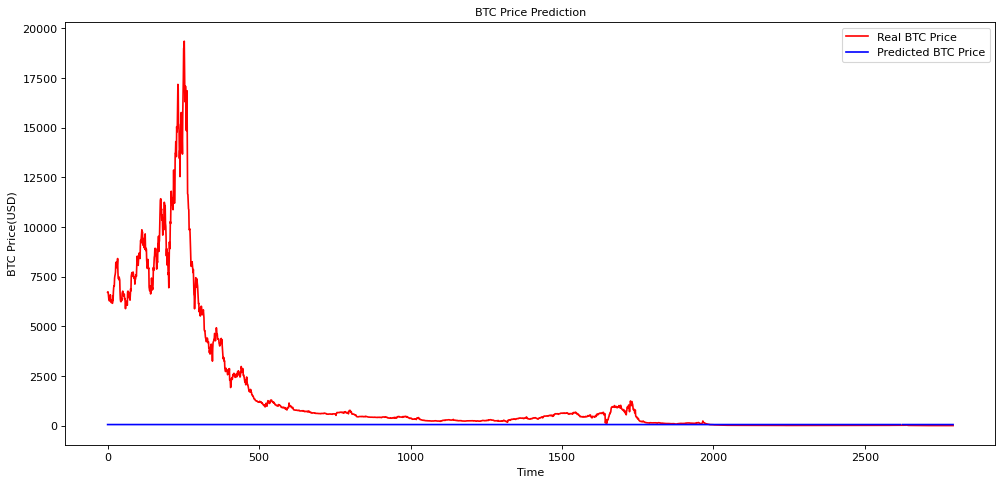

In [ ]:
plt.figure(figsize=(15, 7), dpi=80, facecolor = 'w', edgecolor = 'k')

plt.plot(test_set[:, 0], color='red', label='Real BTC Price')
plt.plot(predicted_price[:, 0], color = 'blue', label = 'Predicted BTC Price')

plt.title('BTC Price Prediction', fontsize = 10)
plt.xlabel('Time', fontsize=10)
plt.ylabel('BTC Price(USD)', fontsize = 10)
plt.legend(loc = 'best')
plt.show()